Loading csv file dataset into pandas dataframe 

NLP data preproessing steps: 
1. Remove special characters 
2. Converting to lowercase
3. Lemmatization 

Spliting dataset into training (70%) and validation (30%) 

Tokenizer
Padding 

Model 

Testing data inference 

In [ ]:
import pandas as pd 
import csv

df_train = pd.read_csv('train.csv')

In [ ]:
df_test=pd.read_csv('test.csv')
df_labels=pd.read_csv('labels.csv')
df_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


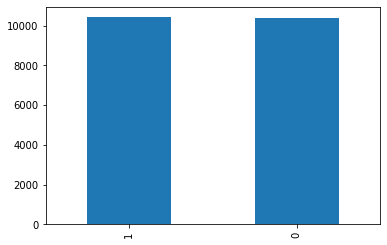

In [ ]:
#### checking the training dataset label distribution to ensure that,
###  we have evenly distributed prediction class 
df_train['label'].value_counts().plot.bar()

In [ ]:
df_author=df_train['author'].value_counts().reset_index()

In [ ]:
df_author[df_author['author']>5]

,index,author
0,Pam Key,243
1,admin,193
2,Jerome Hudson,166
3,Charlie Spiering,141
4,John Hayward,140
...,...,...
625,"Mike Adams, NaturalNews Editor",6
626,Mark Scott,6
627,Edward Wong,6
628,Ryan McMaken,6


In [ ]:
df_train["title_text"]=df_train['title']+" "+df_train['text']
### covert to lowercase
df_train["title_text"]=df_train["title_text"].str.lower()
### removing special characters 
df_train["title_text"]=df_train["title_text"].str.replace("n’t"," not")
df_train["title_text"]=df_train["title_text"].str.replace('\W', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
!pip install nltk
import nltk
from nltk.corpus import stopwords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_train['title_text'] =df_train['title_text'].astype(str)
df_train['title_text'] = df_train['title_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
df_train.head()

,id,title,author,text,label,title_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide even see comey letter jason cha...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman campus breitba...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fired truth might get fired oc...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 civilians killed single us airstrike identi...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jailed fictional unpublished sto...


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df_train['title_text']=df_train['title_text'].astype(str)
df_train['title_text']=df_train['title_text'].apply(lemmatize_text)

In [ ]:
df_train['title_text']=df_train['title_text'].apply(lambda x: ' '.join(x))

df_train['title_text']

0        house dem aide even see comey letter jason cha...
1        flynn hillary clinton big woman campus breitba...
2        truth might get fired truth might get fired oc...
3        15 civilian killed single u airstrike identifi...
4        iranian woman jailed fictional unpublished sto...
                               ...                        
20795    rapper trump poster child white supremacy rapp...
20796    n f l playoff schedule matchup odds new york t...
20797    macy said receive takeover approach hudson bay...
20798    nato russia hold parallel exercise balkan nato...
20799    keep f 35 alive david swanson author activist ...
Name: title_text, Length: 20800, dtype: object

In [ ]:

X=df_train['title_text'].tolist()
y=df_train['label'].tolist()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:

truc_type="post"
oov_tok='<OOV>'
tokenizer=Tokenizer(oov_token="<OOV>")

tokenizer.fit_on_texts(X_train)
sequence=tokenizer.texts_to_sequences(X_train)

max_length=0
for s in sequence: 
  if max_length<len(s):
    max_length=len(s)

padded=pad_sequences(sequence, maxlen=max_length, truncating=truc_type)

word_index=tokenizer.word_index
word_index

testing_sequences=tokenizer.texts_to_sequences(X_test)
testing_padded=pad_sequences(testing_sequences, maxlen=max_length, truncating=truc_type)

In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
max_length

12468

In [ ]:
import tensorflow as tf
import numpy as np
vocab_size=10000
embedding_dims=24

model=tf.keras.Sequential([
          tf.keras.layers.Embedding(vocab_size, embedding_dims, input_length=max_length),
          tf.keras.layers.LSTM(units=256),
          tf.keras.layers.Dense(1, activation='sigmoid')                       
])
                                                                                                                                                                    
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(padded, np.array(y_train), epochs=1, validation_data=(testing_padded, np.array(y_test)))

455/455 [==============================] - 415s 908ms/step - loss: 0.3170 - accuracy: 0.8656 - val_loss: 0.2448 - val_accuracy: 0.9019


In [ ]:
model.save("fake_news.h5")

In [ ]:
### merge df_test with df_labels based on id
df_test=df_test.merge(df_labels, on="id", how="left")
len(df_test)

5200

In [ ]:
df_test["title_text"]=df_test['title']+" "+df_test['text']
print(len(df_test))
### covert to lowercase
df_test["title_text"]=df_test["title_text"].str.lower()

### removing special characters 
df_test["title_text"]=df_test["title_text"].str.replace("n't"," not")
df_test["title_text"]=df_test["title_text"].str.replace('\W', ' ')

### stopwords removal 
df_test['title_text'] =df_test['title_text'].astype(str)
df_test['title_text'] = df_test['title_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(len(df_test))
### Lemmatization 
df_test['title_text']=df_test['title_text'].apply(lemmatize_text)
df_test['title_text']=df_test['title_text'].apply(lambda x: ' '.join(x))
print(len(df_test))

test_sequences=tokenizer.texts_to_sequences(df_test['title_text'])
x_test_padded=pad_sequences(test_sequences, maxlen=max_length, truncating=truc_type)

len(x_test_padded)

5200


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


5200
5200


5200

In [ ]:
df_test

,id,title,author,text,label,title_text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0,specter trump loosens tongue purse string sili...
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1,russian warship ready strike terrorist near al...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0,nodapl native american leader vow stay winter ...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1,tim tebow attempt another comeback time baseba...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1,keiser report meme war e995 42 min ago 1 view ...
...,...,...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...,0,bangladeshi traffic jam never end new york tim...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...,1,john kasich sign one abortion bill ohio veto r...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...,0,california today exactly sushi new york time g...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...,1,300 u marine deployed russian border norway pr...


In [ ]:
y_test=df_test["label"].tolist()

In [ ]:
def predict_fake_news(score):
    return 1 if score>0.5 else 0
history = model.predict(x_test_padded)
model_predictions = [predict_fake_news(score) for score in history]

In [ ]:
from sklearn.metrics import classification_report
classification_report(list(y_test), model_predictions)

'              precision    recall  f1-score   support\n\n           0       0.58      0.67      0.62      2339\n           1       0.69      0.60      0.64      2861\n\n    accuracy                           0.63      5200\n   macro avg       0.63      0.63      0.63      5200\nweighted avg       0.64      0.63      0.63      5200\n'